In [1]:
!pip install transformers torch pillow wget -q

In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration #, GPT2Tokenizer, GPT2LMHeadModel
from PIL import Image
import wget
import os
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
# %rm -rf image_clips

## 이미지 다운로드

In [4]:
# import requests
# from PIL import Image
# import matplotlib.pyplot as plt

# # 이미지 클립 저장 디렉토리
# clip_dir = "./image_clips"
# os.makedirs(clip_dir, exist_ok=True)

# # 새롭게 유효한 연속적인 장면의 샘플 이미지 URL
# image_urls = [
#     "https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg",  # 산의 낮 풍경
#     "https://upload.wikimedia.org/wikipedia/commons/a/a9/Example.jpg",  # 석양
# ]

# # 사용자 정의 User-Agent 설정
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
# }

# # 이미지 다운로드
# image_files = []
# for idx, url in enumerate(image_urls):
#     file_path = os.path.join(clip_dir, f"clip_{idx+1}.jpg")
#     try:
#         response = requests.get(url, headers=headers, stream=True)  # User-Agent 추가
#         response.raise_for_status()
#         with open(file_path, "wb") as f:
#             f.write(response.content)
#         image_files.append(file_path)
#         print(f"Downloaded: {file_path}")
#     except requests.exceptions.RequestException as e:
#         print(f"Failed to download {url}: {e}")

In [5]:
# from PIL import Image, ImageDraw

# # 연속적인 샘플 이미지 생성
# def create_sample_image(filename, color, text):
#     img = Image.new('RGB', (400, 300), color=color)  # 400x300 크기의 단색 이미지
#     draw = ImageDraw.Draw(img)
#     draw.text((150, 140), text, fill="white")  # 중앙에 텍스트 추가
#     img.save(filename)

# # 생성할 이미지 클립
# image_info = [
#     ("clip_3.jpg", "blue", "Day"),
#     ("clip_4.jpg", "orange", "Sunset"),
#     ("clip_5.jpg", "black", "Night"),
# ]

# # 이미지 생성 및 저장
# for filename, color, text in image_info:
#     file_path = os.path.join(clip_dir, filename)
#     create_sample_image(file_path, color, text)
#     image_files.append(file_path)

In [6]:
# image_files

In [7]:
image_files = []
image_path = "/kaggle/input/korea-celebrities"

for dirname, _, filenames in os.walk(image_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        image_files.append(file_path)

/kaggle/input/korea-celebrities/������_����.jpg
/kaggle/input/korea-celebrities/�����߶�.jpg
/kaggle/input/korea-celebrities/������.jpg
/kaggle/input/korea-celebrities/������_���.jpg


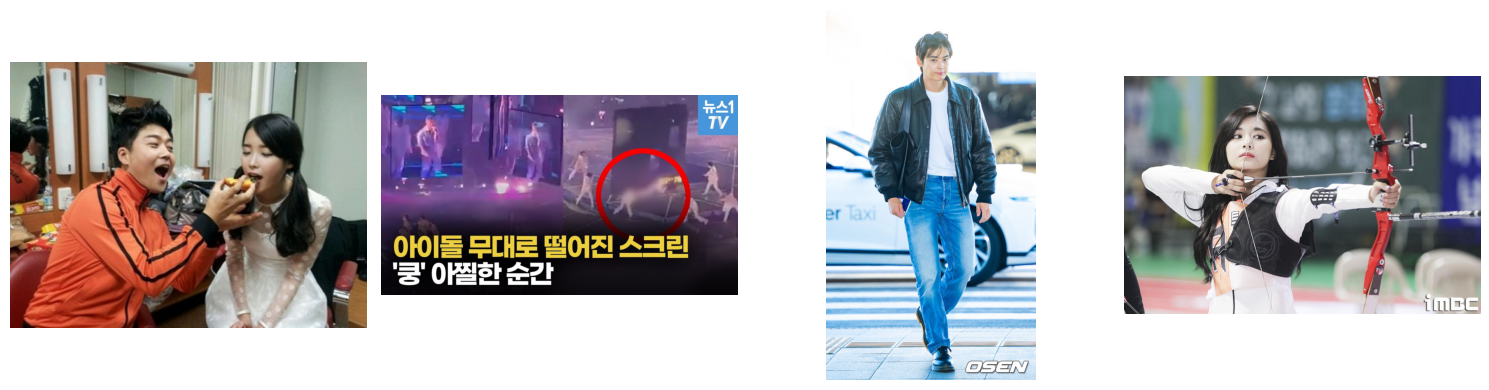

In [8]:
# matplotlib로 이미지 시각화
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 4))
for ax, img_path in zip(axes, image_files):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout()
plt.show()

## Blip으로 caption 생성

In [9]:
# BLIP 모델 불러오기
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
# gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [10]:
# 프레임 묘사 생성 (BLIP)
def generate_frame_captions(image_files):
    captions = []
    for image_path in image_files:
        image = Image.open(image_path)
        
        inputs = blip_processor(image, return_tensors="pt")
        outputs = blip_model.generate(**inputs)

        print(outputs)
        
        caption = blip_processor.decode(outputs[0], skip_special_tokens=True)
        captions.append(caption)
    return captions


frame_captions = generate_frame_captions(image_files)

# 출력 결과
print("프레임 설명:")
for frame in frame_captions:
    print(frame)

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tensor([[30522,  1037,  2158,  1998,  2450,  5983,  2833,  1999,  2019,  2436,
           102]])
tensor([[30522,  1031,   100,   100,   100,   100,   100,   100,   100,   100,
           100,   100,   100,   100,   100,   100,   100,   100,   100,   100]])
tensor([[30522,  1037,  2158,  1999,  1037,  2304,  5898,  6598,  1998,  6312,
           102]])
tensor([[30522,  1037,  2450,  1999,  1037,  2317,  3797,  3173,  1037,  2417,
          6812,   102]])
프레임 설명:
a man and woman eating food in an office
[
a man in a black leather jacket and jeans
a woman in a white shirt holding a red bow


## 자막

In [11]:
korean_subtitles = """1
00:00:00,000 --> 00:00:05,000
대기실에 전현무, 아이유 있음

2
00:00:05,000 --> 00:00:10,000
아이돌 무대로 떨어진 스크린. '쿵' 아찔한 순간

3
00:00:10,000 --> 00:00:15,000
사진 속 사람: 차은우

4
00:00:15,000 --> 00:00:20,000
아이돌 육상대회. 활 쏘는 사람: 쯔위.
"""

english_subtitles = """1
00:00:00,000 --> 00:00:05,000
Wating room. A singer: IU

2
00:00:05,000 --> 00:00:10,000
Dangerous moment. A screen fallen

3
00:00:10,000 --> 00:00:15,000
A person in the picture:  Eunwoo Cha

4
00:00:15,000 --> 00:00:20,000
Idol Star Athletics Championships. Twice Tzuyu is shooting a bow.
"""

# 샘플 자막 생성
subtitle_file = "./sample_subtitles.srt"
with open(subtitle_file, "w", encoding="utf-8") as f:
    f.write(english_subtitles)

In [12]:
# 자막 로드 함수
def load_subtitles(subtitle_file):
    with open(subtitle_file, "r", encoding="utf-8") as f:
        return f.read()

subtitles = load_subtitles(subtitle_file)

print("자막:")
print(subtitles)

자막:
1
00:00:00,000 --> 00:00:05,000
Wating room. A singer: IU

2
00:00:05,000 --> 00:00:10,000
Dangerous moment. A screen fallen

3
00:00:10,000 --> 00:00:15,000
A person in the picture:  Eunwoo Cha

4
00:00:15,000 --> 00:00:20,000
Idol Star Athletics Championships. Twice Tzuyu is shooting a bow.



## Blip으로 생성한 caption 및 자막 정보로 요약

In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# T5 모델 로드: 요약에 강하다. 언어모델. GPT, GEMINI
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [14]:
# 텍스트 클리닝 함수
def clean_text(frame_captions, subtitles=None):
    subtitles_list =  subtitles.split('\n\n')
    if frame_captions and subtitles:
        image_captions_subtitles_joined = [subtitle  + 
                                           ". " + image_caption 
                                           for image_caption, subtitle 
                                           in zip(frame_captions, subtitles_list)]

    joined_subtitles = "\n\n".join(image_captions_subtitles_joined)
    return joined_subtitles

# T5 요약 함수
def generate_summary_t5(image_captions, subtitles=None):
    input_text = clean_text(image_captions, subtitles)
    input_prompt = f"summarize: {input_text}"
    input_ids = t5_tokenizer.encode(input_prompt, return_tensors="pt", max_length=512, truncation=True)

    # T5 요약 생성
    output_ids = t5_model.generate(
        input_ids=input_ids,
        max_length=150,
        num_return_sequences=1,
        no_repeat_ngram_size=3,
        temperature=0.7
    )
    return t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# 실행
summary = generate_summary_t5(frame_captions, subtitles)

# 결과 출력
print("생성된 요약:")
print(summary)

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


생성된 요약:
a man and woman eating food in an office 2 00:00:05,000 --> 08:00:10,000 Dangerous moment. A screen fell. a person in the picture: Eunwoo Cha.
